# Apply opsin templates to absorbance measurements

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from dreye.core.opsin_template import (
    stavenga1993_template, govardovskii2000_template
)

In [3]:
df = pd.read_csv('raw_absorbances.csv')
df.head()

,opsin_name,opsin_source,wl_index,opsin_sensitivity,opsin_wavelengths
0,rh1,salcedo2003_extrapolate,0,0.159730,302.0
1,rh1,salcedo2003_extrapolate,1,0.159990,302.5
2,rh1,salcedo2003_extrapolate,2,0.160250,303.0
3,rh1,salcedo2003_extrapolate,3,0.160455,303.5
4,rh1,salcedo2003_extrapolate,4,0.160660,304.0


In [4]:
wls = np.arange(200, 800, 0.5)

In [5]:
wl_max = df.groupby(
    ['opsin_name', 'opsin_source']
).apply(lambda x: x['opsin_wavelengths'].to_numpy()[np.argmax(x['opsin_sensitivity'].to_numpy())])
wl_max.name = 'wl_max'
wl_max = wl_max.reset_index()
wl_max

,opsin_name,opsin_source,wl_max
0,rh1,salcedo2003_extrapolate,345.0
1,rh3,hardie1983_manual,340.0
2,rh3,salcedo2003_extrapolate,347.0
3,rh4,hardie1983_manual,362.0
4,rh4,salcedo2003_extrapolate,375.0
5,rh5,hardie1983_manual,470.0
6,rh5,salcedo2003_extrapolate,436.0
7,rh6,hardie1983_manual,540.0
8,rh6,salcedo2003_extrapolate,514.0


In [6]:
opsin_source = 'salcedo2003_extrapolate'
dropopsin = ['rh1']

In [7]:
rh1 = df[
    (df['opsin_source'] == opsin_source)
    & (df['opsin_name'] == 'rh1')
].set_index('opsin_wavelengths')['opsin_sensitivity']
rh1.name = 'rh1'

In [8]:
wl_maxs = wl_max[
    ~wl_max['opsin_name'].isin(dropopsin) 
    & (wl_max['opsin_source'] == opsin_source)
]['wl_max'].to_numpy()[None]

In [9]:
sdf = df[df['opsin_source'] == opsin_source].pivot(
    'opsin_wavelengths', 
    'opsin_name', 
    'opsin_sensitivity'
).drop(columns=dropopsin)

In [10]:
st_opsins = stavenga1993_template(
    wls[:, None], wl_maxs, A_beta=0
)
go_opsins = govardovskii2000_template(
    wls[:, None], wl_maxs, A_beta=0, 
    # A_alpha=10
)

In [11]:
rh3456 = go_opsins

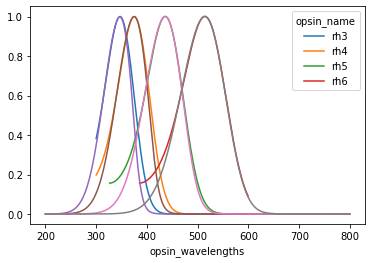

In [12]:
sdf.plot()
plt.plot(wls, go_opsins)
# plt.plot(wls, st_opsins, linestyle='--')

<AxesSubplot:xlabel='opsin_wavelengths'>

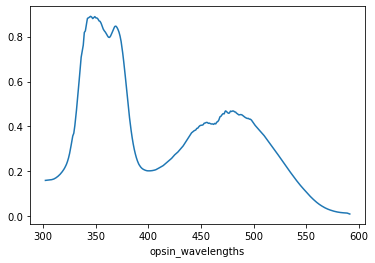

In [13]:
rh1.plot()

In [14]:
from scipy.interpolate import interp1d

In [15]:
go_opsins = govardovskii2000_template(
    wls, np.array([485])
)  # rh1 opsin

In [16]:
new_rh1 = interp1d(
    rh1.index, 
    rh1, 
    kind='cubic', 
    bounds_error=False, 
    fill_value=np.nan
)(wls)

In [17]:
new_rh1[np.isnan(new_rh1)] = go_opsins[np.isnan(new_rh1)]

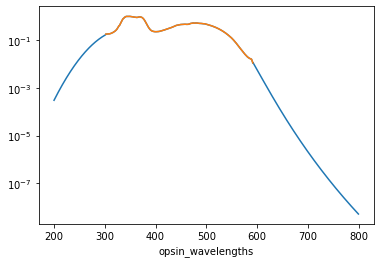

In [18]:
plt.plot(wls, new_rh1/new_rh1.max())
(rh1/rh1.max()).plot()
plt.yscale('log')

In [19]:
all_opsins = np.hstack([new_rh1[:, None], rh3456])
all_opsins /= np.max(all_opsins, axis=0)

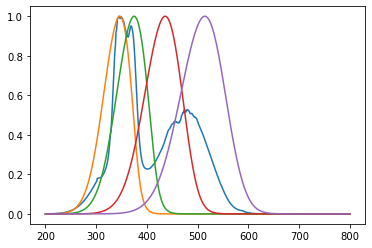

In [20]:
plt.plot(wls, all_opsins)

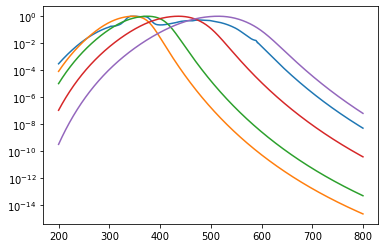

In [21]:
plt.plot(wls, all_opsins)
plt.yscale('log')

In [22]:
from dreye import Sensitivity

In [28]:
sensitivity = Sensitivity(
    350, wls, labels='rh3'
)

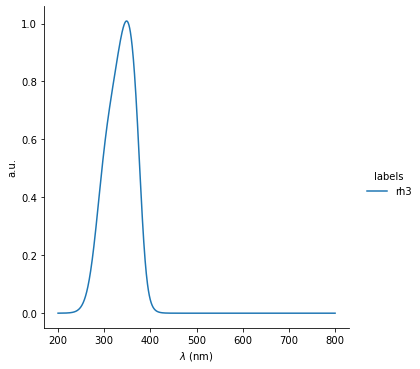

In [29]:
sensitivity.plot()